In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import torch
import torch.nn as nn

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-electron/data/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5
/kaggle/input/data-electron/data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5


In [2]:
import os

dataset_path = "/kaggle/input/data-electron"
files = os.listdir(dataset_path)
print(files)


['data']


In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import os

file_path = "/kaggle/input/data-electron/data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5"
print("File exists:", os.path.exists(file_path))


File exists: True


In [5]:
fileIN = "/kaggle/input/data-electron/data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5"
df = h5py.File(fileIN)

In [6]:
df.keys()

<KeysViewHDF5 ['X', 'y']>

In [7]:
feature = df.get('X')
print(feature)
target = df.get('y')
print(target)

<HDF5 dataset "X": shape (249000, 32, 32, 2), type "<f4">
<HDF5 dataset "y": shape (249000,), type "<f4">


In [8]:
with h5py.File(fileIN, "r") as f:
    X = np.array(f["X"])
    Y = np.array(f["y"])


print(f"X.shape = {X.shape}")
print(f"Y.shape = {Y.shape}")

X.shape = (249000, 32, 32, 2)
Y.shape = (249000,)


In [9]:
# Check min, max, mean for both channels
print("Energy Channel: min =", X[:, :, :, 0].min(), 
      " max =", X[:, :, :, 0].max(), 
      " mean =", X[:, :, :, 0].mean(), 
      "std =", X[:, :, :, 0].std()
     )
print("Time Channel: min =", X[:, :, :, 1].min(), 
      " max =", X[:, :, :, 1].max(), 
      " mean =", X[:, :, :, 1].mean(), 
      "std =", X[:, :, :, 1].std()
     )

# Check unique labels
unique_labels, label_counts = np.unique(Y, return_counts=True)
print("Unique Labels:", unique_labels)
print("Label Distribution:", dict(zip(unique_labels, label_counts)))


Energy Channel: min = 0.0  max = 1.431813  mean = 0.0012158361 std = 0.022602545
Time Channel: min = -2.512557  max = 2.2756603  mean = -0.00028657867 std = 0.069257006
Unique Labels: [1.]
Label Distribution: {1.0: 249000}


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.0


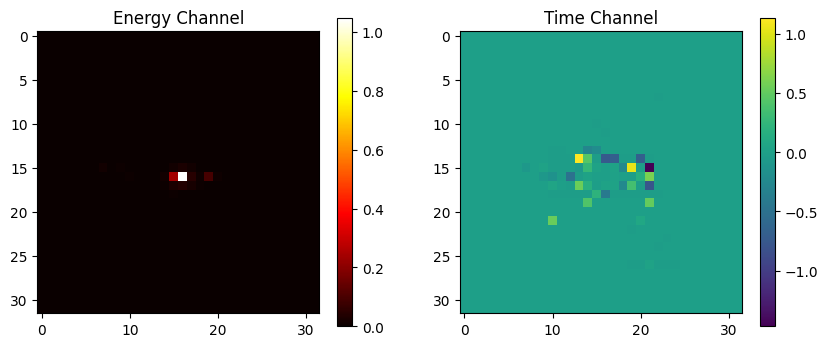

In [10]:
energy = X[0,:, :, 0]
time = X[0,:, :, 1]
label = Y[0]

print(energy)
print(time)
print(label)

# Plot Energy Channel
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(energy, cmap="hot") 
plt.colorbar()
plt.title("Energy Channel")

# Plot Time Channel
plt.subplot(1, 2, 2)
plt.imshow(time)  
plt.colorbar()
plt.title("Time Channel")

plt.show()

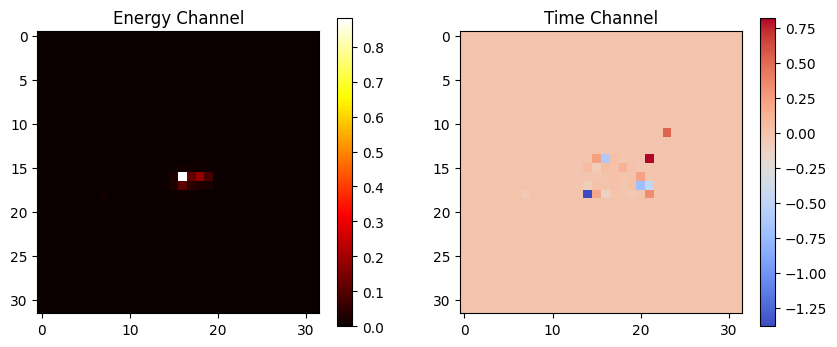

label is 1.0


In [11]:
def energy_time_plotter(n):
    energy_ = X[n, :, :, 0] 
    time_ = X[n, :, :, 1]   
    
    plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    plt.imshow(energy_, cmap="hot")  
    plt.colorbar()
    plt.title("Energy Channel")

    # Plot Time Channel
    plt.subplot(1, 2, 2)
    plt.imshow(time_, cmap = 'coolwarm')  
    plt.colorbar()
    plt.title("Time Channel")

    plt.show()

    return print(f"label is {label}")

energy_time_plotter(5)


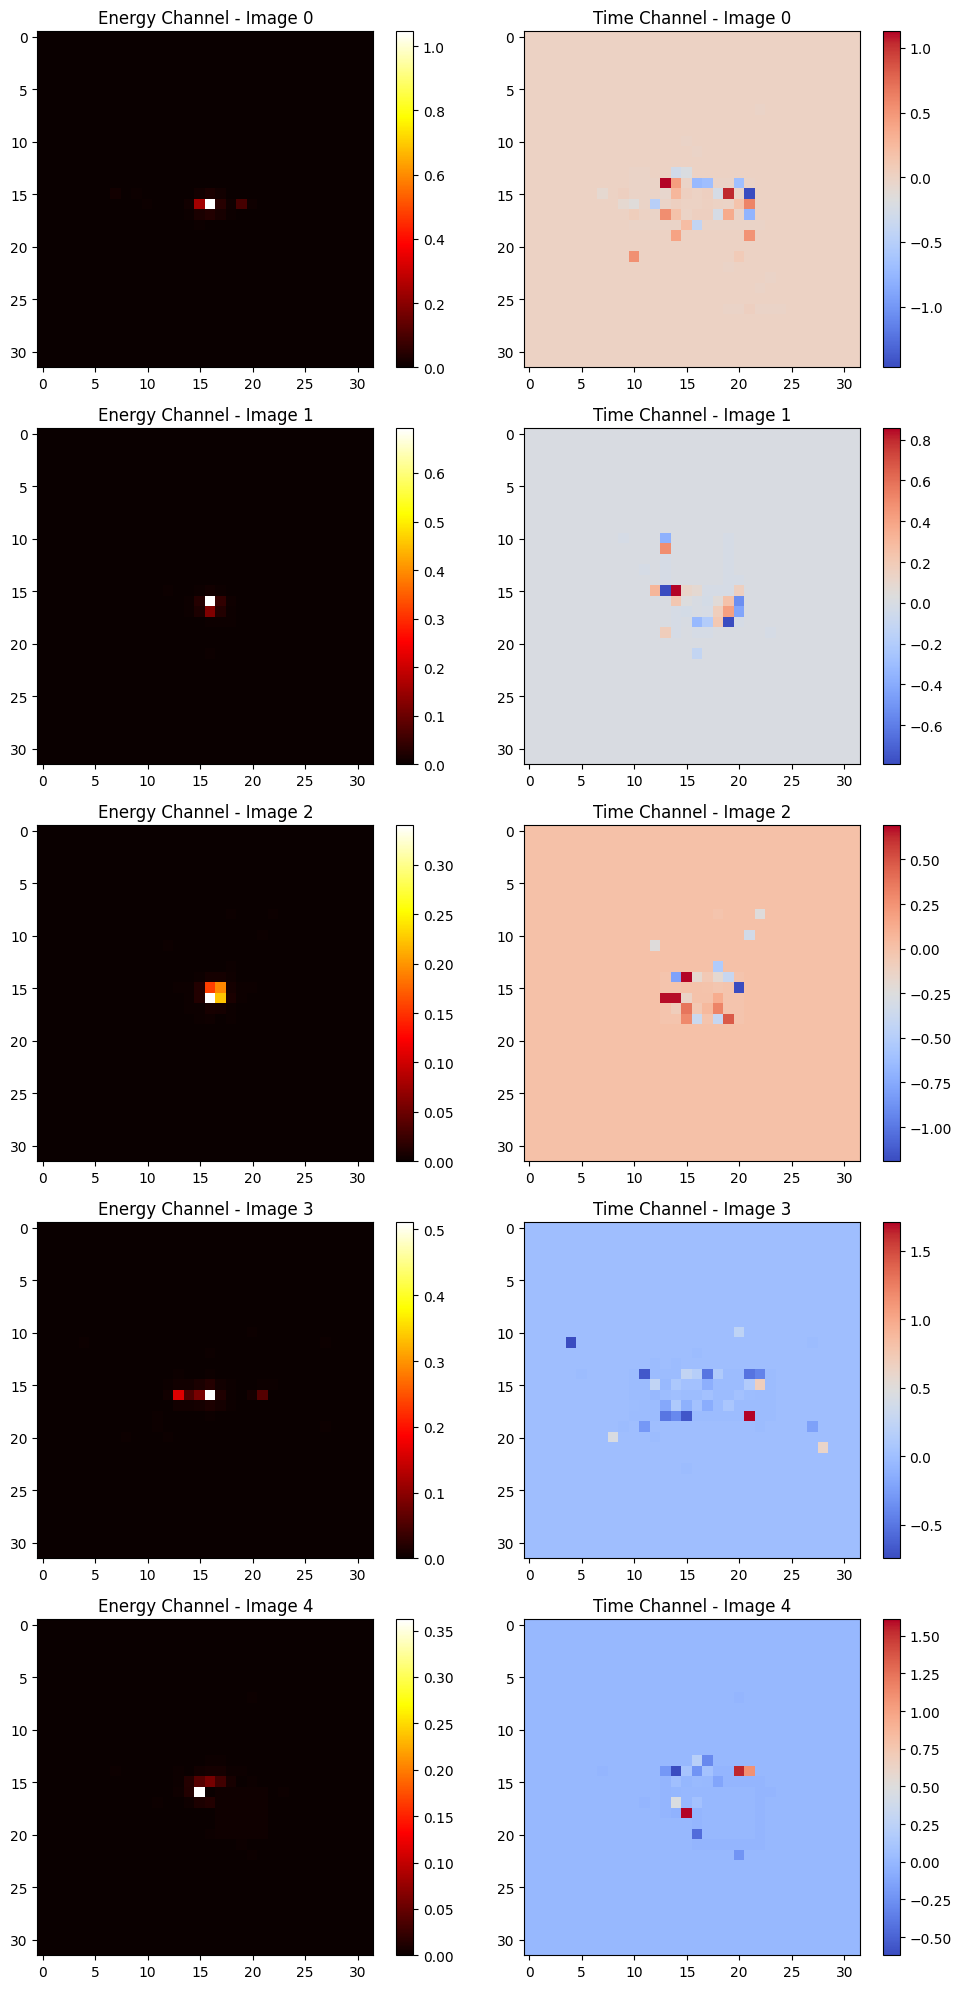

In [12]:
def plot_multiple_energy_time(n=5):
    plt.figure(figsize=(10, 4 * n))  

    for i in range(n):
        energy_ = X[i, :, :, 0]  
        time_ = X[i, :, :, 1]    
        
        # Plot Energy Channel
        plt.subplot(n, 2, 2 * i + 1)  
        plt.imshow(energy_, cmap="hot")
        plt.colorbar()
        plt.title(f"Energy Channel - Image {i}")

        # Plot Time Channel
        plt.subplot(n, 2, 2 * i + 2)
        plt.imshow(time_, cmap="coolwarm")  
        plt.colorbar()
        plt.title(f"Time Channel - Image {i}")

    plt.tight_layout()  
    plt.show()


plot_multiple_energy_time(5)


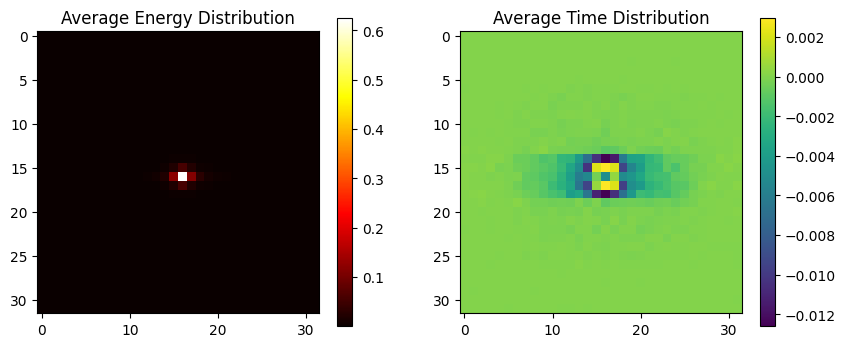

In [13]:
avg_energy = X[:, :, :, 0].mean(axis=0)  
avg_time = X[:, :, :, 1].mean(axis=0)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(avg_energy, cmap="hot")
plt.colorbar()
plt.title("Average Energy Distribution")

plt.subplot(1,2,2)
plt.imshow(avg_time)
plt.colorbar()
plt.title("Average Time Distribution")

plt.show()


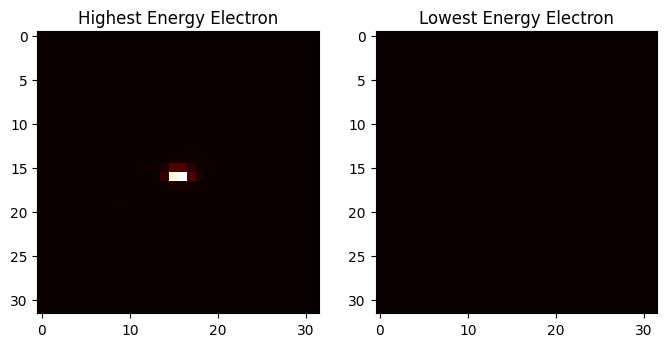

In [14]:
energy_sums = X[:, :, :, 0].sum(axis=(1,2))  # Total energy per image
high_idx = np.argmax(energy_sums)  # Highest energy sample
low_idx = np.argmin(energy_sums)   # Lowest energy sample

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(X[high_idx, :, :, 0], cmap="hot")
plt.title("Highest Energy Electron")

plt.subplot(1,2,2)
plt.imshow(X[low_idx, :, :, 0], cmap="hot")
plt.title("Lowest Energy Electron")

plt.show()


# PHOTONS

In [15]:
import os

file_path = "/kaggle/input/data-electron/data/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"
print("File exists:", os.path.exists(file_path))


File exists: True


In [16]:
fileIN = "/kaggle/input/data-electron/data/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"
dfp= h5py.File(fileIN)

In [17]:
dfp.keys()


<KeysViewHDF5 ['X', 'y']>

In [18]:
feature = dfp.get('X')
print(feature)
target = dfp.get('y')
print(target)

<HDF5 dataset "X": shape (249000, 32, 32, 2), type "<f4">
<HDF5 dataset "y": shape (249000,), type "<f4">


In [19]:
with h5py.File(fileIN, "r") as fp:
    Xp = np.array(fp["X"])
    Yp = np.array(fp["y"])


print(f"X.shape = {Xp.shape}")
print(f"Y.shape = {Yp.shape}")

X.shape = (249000, 32, 32, 2)
Y.shape = (249000,)


In [20]:
# Check min, max, mean for both channels
print("Energy Channel: min =", Xp[:, :, :, 0].min(), 
      " max =", Xp[:, :, :, 0].max(), 
      " mean =", Xp[:, :, :, 0].mean(), 
      "std =", Xp[:, :, :, 0].std()
     )
print("Time Channel: min =", Xp[:, :, :, 1].min(), 
      " max =", Xp[:, :, :, 1].max(), 
      " mean =", Xp[:, :, :, 1].mean(), 
      "std =", Xp[:, :, :, 1].std()
     )

# Check unique labels
unique_labels, label_counts = np.unique(Yp, return_counts=True)
print("Unique Labels:", unique_labels)
print("Label Distribution:", dict(zip(unique_labels, label_counts)))


Energy Channel: min = 0.0  max = 1.4849443  mean = 0.0012234972 std = 0.024789166
Time Channel: min = -2.512557  max = 2.2779698  mean = -0.00023703692 std = 0.06545664
Unique Labels: [0.]
Label Distribution: {0.0: 249000}


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0


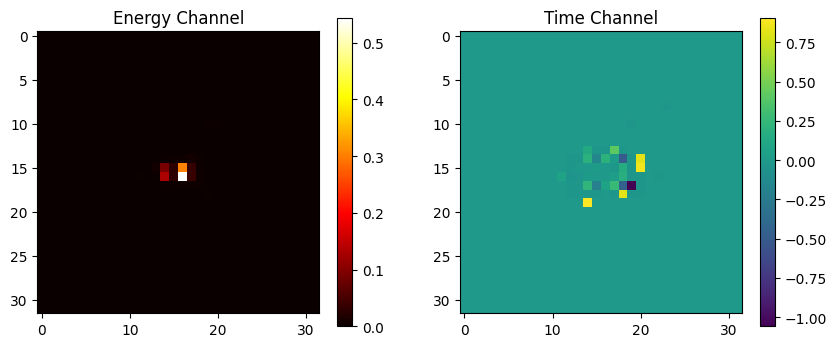

In [21]:
energy = Xp[0,:, :, 0]
time = Xp[0,:, :, 1]
label = Yp[0]

print(energy)
print(time)
print(label)

# Plot Energy Channel
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(energy, cmap="hot") 
plt.colorbar()
plt.title("Energy Channel")

# Plot Time Channel
plt.subplot(1, 2, 2)
plt.imshow(time)  
plt.colorbar()
plt.title("Time Channel")

plt.show()

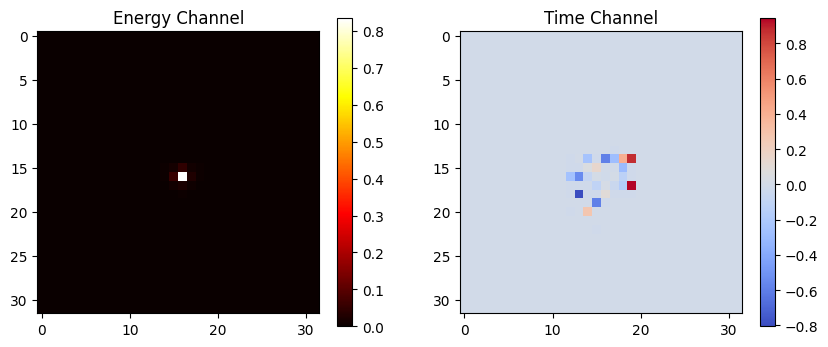

label is 0.0


In [22]:
def energy_time_plotter(n):
    energy_ = Xp[n, :, :, 0] 
    time_ = Xp[n, :, :, 1]   
    
    plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    plt.imshow(energy_, cmap="hot")  
    plt.colorbar()
    plt.title("Energy Channel")

    # Plot Time Channel
    plt.subplot(1, 2, 2)
    plt.imshow(time_, cmap = 'coolwarm')  
    plt.colorbar()
    plt.title("Time Channel")

    plt.show()

    return print(f"label is {label}")

energy_time_plotter(5)


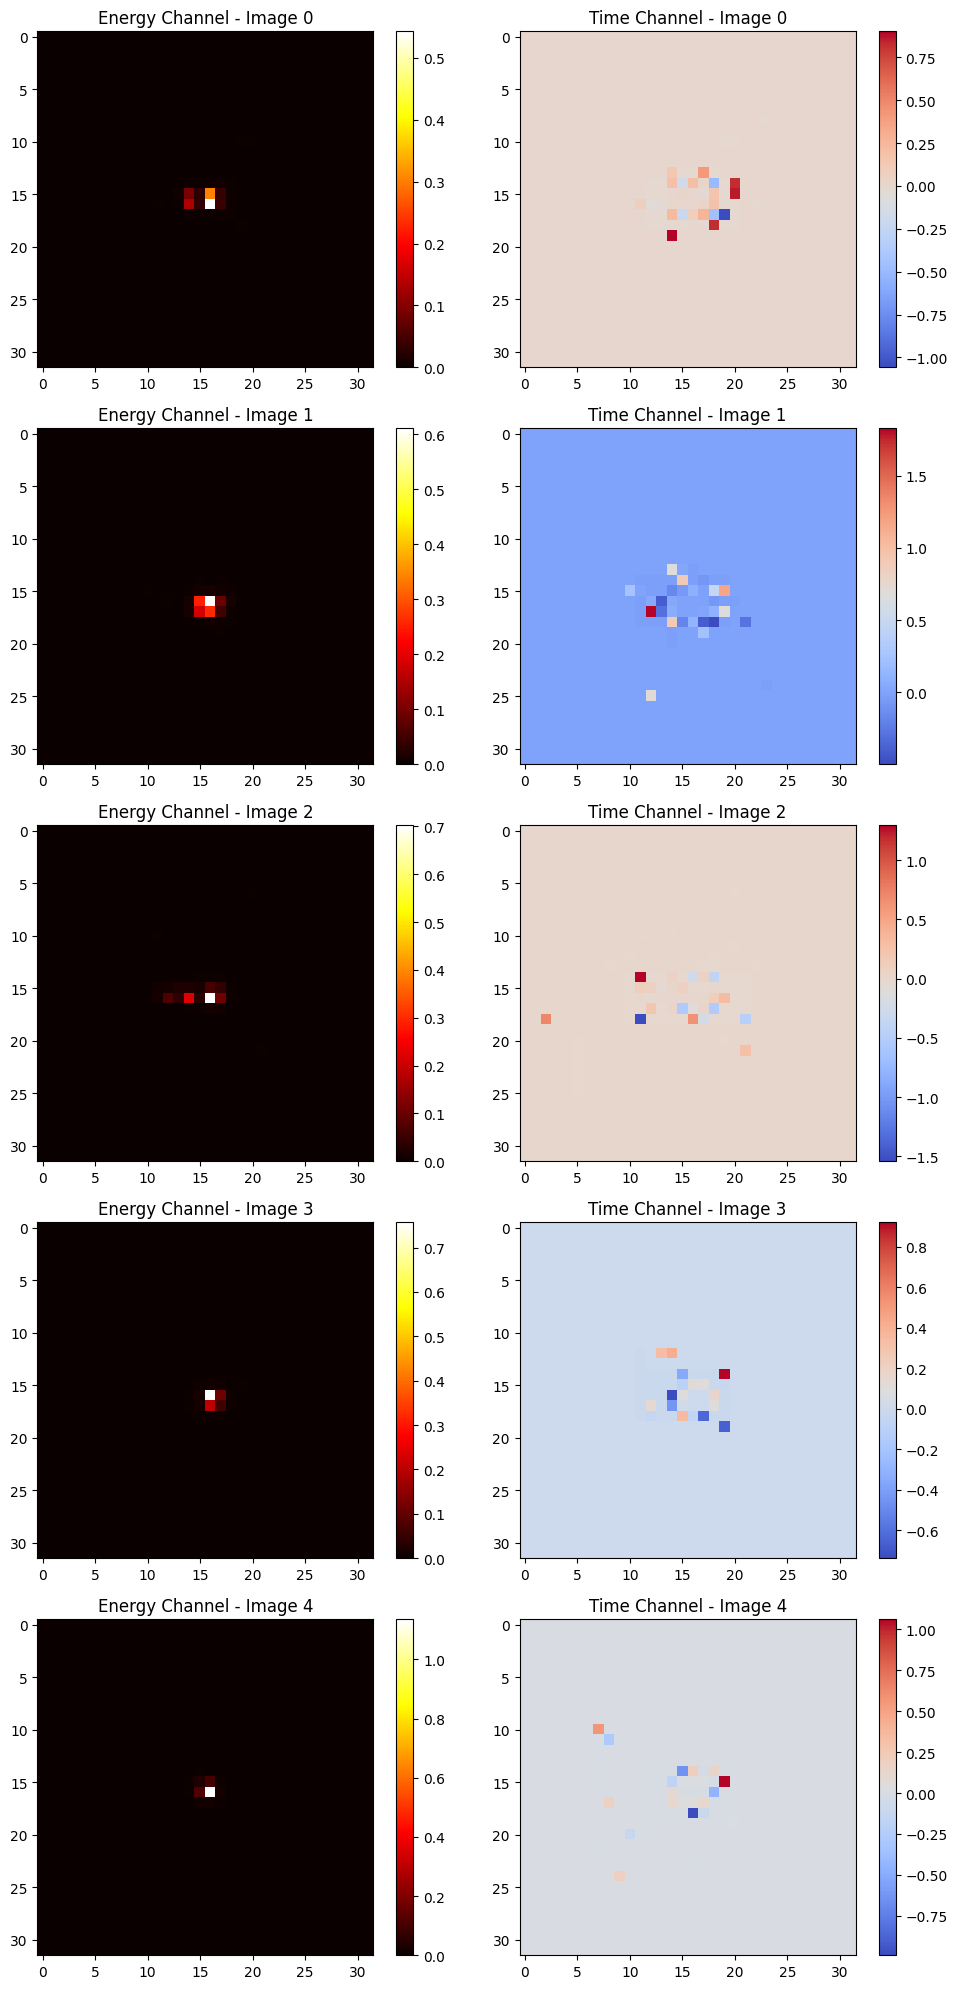

In [23]:
def plot_multiple_energy_time(n=5):
    plt.figure(figsize=(10, 4 * n))  

    for i in range(n):
        energy_ = Xp[i, :, :, 0]  
        time_ = Xp[i, :, :, 1]    
        
        # Plot Energy Channel
        plt.subplot(n, 2, 2 * i + 1)  
        plt.imshow(energy_, cmap="hot")
        plt.colorbar()
        plt.title(f"Energy Channel - Image {i}")

        # Plot Time Channel
        plt.subplot(n, 2, 2 * i + 2)
        plt.imshow(time_, cmap="coolwarm")  
        plt.colorbar()
        plt.title(f"Time Channel - Image {i}")

    plt.tight_layout()  
    plt.show()


plot_multiple_energy_time(5)


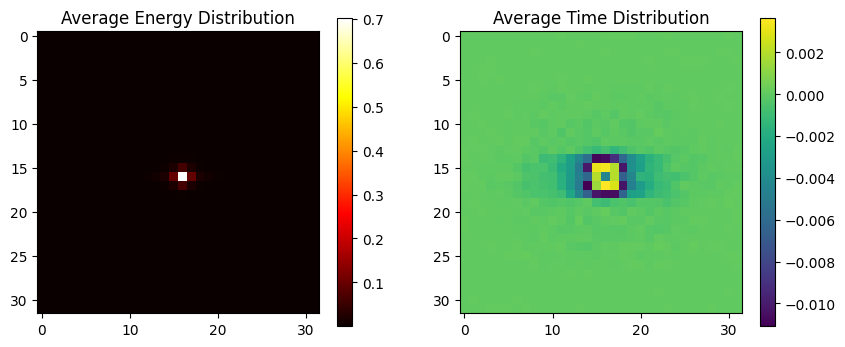

In [24]:
avg_energy = Xp[:, :, :, 0].mean(axis=0)  
avg_time = Xp[:, :, :, 1].mean(axis=0)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(avg_energy, cmap="hot")
plt.colorbar()
plt.title("Average Energy Distribution")

plt.subplot(1,2,2)
plt.imshow(avg_time)
plt.colorbar()
plt.title("Average Time Distribution")

plt.show()


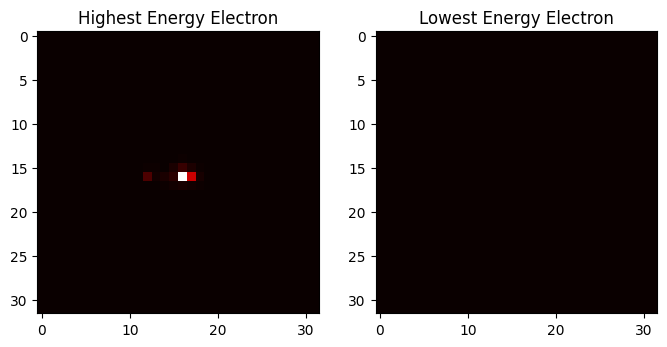

In [25]:
energy_sums = Xp[:, :, :, 0].sum(axis=(1,2))  # Total energy per image
high_idx = np.argmax(energy_sums)  # Highest energy sample
low_idx = np.argmin(energy_sums)   # Lowest energy sample

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(Xp[high_idx, :, :, 0], cmap="hot")
plt.title("Highest Energy Electron")

plt.subplot(1,2,2)
plt.imshow(Xp[low_idx, :, :, 0], cmap="hot")
plt.title("Lowest Energy Electron")

plt.show()


# **DeeP Learning Model(ResnNet) for electron and photon classification problem**

In [26]:
import numpy as np
import h5py
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import transforms
from sklearn.model_selection import train_test_split
import seaborn as sns

In [27]:
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        X_ = np.array(f['X'])  # (249000, 32, 32, 2)
        y_ = np.array(f['y'])  # (249000,)
    return X_, y_

In [28]:
electron_path = '/kaggle/input/data-electron/data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5'
photon_path = '/kaggle/input/data-electron/data/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5'


In [29]:
X_electron, y_electron = load_h5_data(electron_path)
X_photon, y_photon = load_h5_data(photon_path)

In [30]:
print("Electron Data Shape:", X_electron.shape, y_electron.shape)
print("Photon Data Shape:", X_photon.shape, y_photon.shape)


Electron Data Shape: (249000, 32, 32, 2) (249000,)
Photon Data Shape: (249000, 32, 32, 2) (249000,)


In [31]:
X_ = np.concatenate((X_electron, X_photon), axis=0)
y_ = np.concatenate((y_electron, y_photon), axis=0)
X_ = (X_ - X_.mean()) / X_.std()  # Normalize

In [32]:
# First split: 60% train, 40% temp (val + test)
X_train, temp_X_val, y_train, temp_y_val = train_test_split(X_, y_, test_size=0.4, random_state=42, stratify=y_)

# Second split: 50% of temp set for validation, 50% for test (each 20% of total data)
X_val, X_test, y_val, y_test = train_test_split(temp_X_val, temp_y_val, test_size=0.5, random_state=42, stratify=temp_y_val)

# Print dataset sizes
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Train set: (298800, 32, 32, 2), (298800,)
Validation set: (99600, 32, 32, 2), (99600,)
Test set: (99600, 32, 32, 2), (99600,)


In [33]:
# Convert to PyTorch tensors(need to change the order of X[n,32,32,2] to X[n,2,32,32])
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # (N, C, H, W)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)  # Validation tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)  # Test tensor

y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Training labels
y_val_tensor = torch.tensor(y_val, dtype=torch.long)  # Validation labels
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Test labels



In [34]:
# Create TensorDataset for training, validation, and test sets
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = data.TensorDataset(X_val_tensor, y_val_tensor)  # Validation dataset
test_dataset = data.TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader for batching and shuffling
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)   # Shuffle for training
val_loader = data.DataLoader(val_dataset, batch_size=64, shuffle=False)     # No shuffle for validation
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)   # No shuffle for testing


In [35]:
class ResNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ResNet, self).__init__()

        self.conv1 = nn.Conv2d(2, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        # First residual block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(64)
        self.res1 = nn.Conv2d(32, 64, kernel_size=1, stride=2, bias=False)
        self.res1_bn = nn.BatchNorm2d(64)
        

        # Second residual block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn3 = nn.BatchNorm2d(128)
        self.res2 = nn.Conv2d(64, 128, kernel_size=1, stride=2, bias=False)
        self.res2_bn = nn.BatchNorm2d(128)
        

        # Third residual block
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn4 = nn.BatchNorm2d(256)
        self.res3 = nn.Conv2d(128, 256, kernel_size=1, stride=2, bias=False)
        self.res3_bn = nn.BatchNorm2d(256)
        

        # Global Average Pooling and FC layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        # First residual block
        res1 = self.res1(x)
        res1 = self.res1_bn(res1)
        x = self.conv2(x)
        x = self.bn2(x)
        x += res1
        x = self.dropout(x)
        x = self.relu(x)

        # Second residual block
        res2 = self.res2(x)
        res2 = self.res2_bn(res2)
        x = self.conv3(x)
        x = self.bn3(x)
        x += res2
        x = self.dropout(x)
        x = self.relu(x)

        # Third residual block
        res3 = self.res3(x)
        res3 = self.res3_bn(res3)
        x = self.conv4(x)
        x = self.bn4(x)
        x += res3
        x = self.dropout(x)
        x = self.relu(x)

        # Global Average Pooling
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)

        return x


In [36]:
# Initialize model, loss function, and optimizer
from torch.optim.lr_scheduler import ReduceLROnPlateau
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)


In [37]:
print(model)

ResNet(
  (conv1): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (res1): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
  (res1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (res2): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
  (res2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn

In [38]:
epochs = 20
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training Loop
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)



    model.eval()
    val_loss = 0.0
    correct_val = 0

    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    scheduler.step(val_loss)

    # Optional: print current learning rate to track changes
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Learning Rate after epoch {epoch+1}: {current_lr:.6f}")




Epoch 1/20, Train Loss: 0.6507, Train Acc: 0.6214, Val Loss: 0.6137, Val Acc: 0.6723
Learning Rate after epoch 1: 0.000500
Epoch 2/20, Train Loss: 0.6116, Train Acc: 0.6739, Val Loss: 0.5929, Val Acc: 0.6909
Learning Rate after epoch 2: 0.000500
Epoch 3/20, Train Loss: 0.6001, Train Acc: 0.6857, Val Loss: 0.5832, Val Acc: 0.7002
Learning Rate after epoch 3: 0.000500
Epoch 4/20, Train Loss: 0.5923, Train Acc: 0.6943, Val Loss: 0.5796, Val Acc: 0.7057
Learning Rate after epoch 4: 0.000500
Epoch 5/20, Train Loss: 0.5864, Train Acc: 0.6990, Val Loss: 0.5713, Val Acc: 0.7119
Learning Rate after epoch 5: 0.000500
Epoch 6/20, Train Loss: 0.5811, Train Acc: 0.7039, Val Loss: 0.5696, Val Acc: 0.7132
Learning Rate after epoch 6: 0.000500
Epoch 7/20, Train Loss: 0.5763, Train Acc: 0.7079, Val Loss: 0.5654, Val Acc: 0.7150
Learning Rate after epoch 7: 0.000500
Epoch 8/20, Train Loss: 0.5732, Train Acc: 0.7103, Val Loss: 0.5663, Val Acc: 0.7138
Learning Rate after epoch 8: 0.000500
Epoch 9/20, Trai

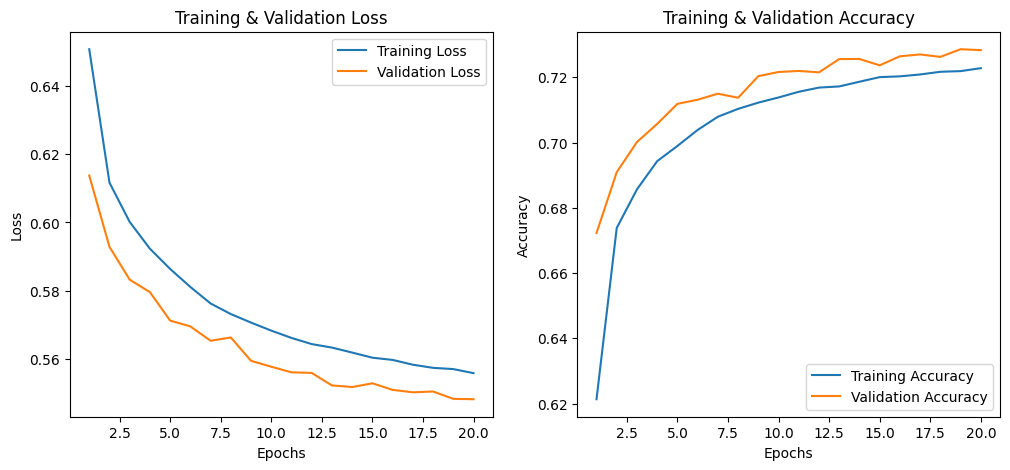

In [39]:
# Plot Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, epochs+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()


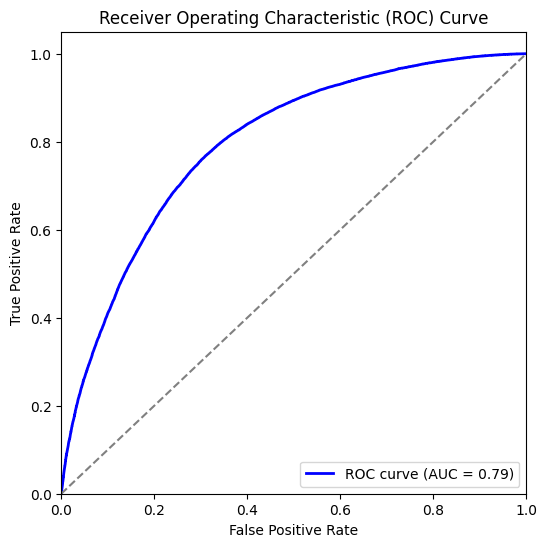

In [40]:
from sklearn.metrics import roc_curve, auc
import numpy as np

model.eval()
y_true = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Get raw logits
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Get probabilities for class 1
        y_scores.extend(probs.cpu().numpy())  # Convert to NumPy array
        y_true.extend(labels.cpu().numpy())

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


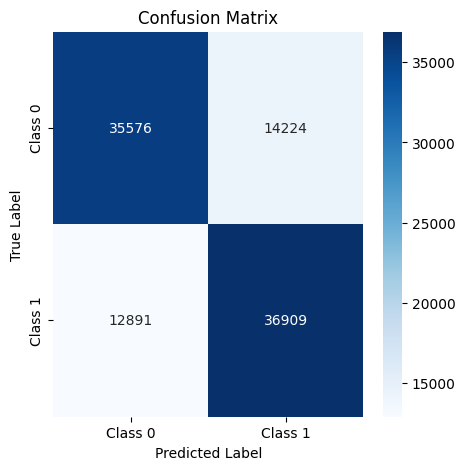

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Convert probabilities to class predictions
y_pred = (y_scores >= 0.5).astype(int)  # Assuming a threshold of 0.5

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
